In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('us_construction_clean.csv')
df.shape

(2840246, 47)

In [4]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

<Axes: xlabel='Wind_Chill(F)', ylabel='Temperature(F)'>

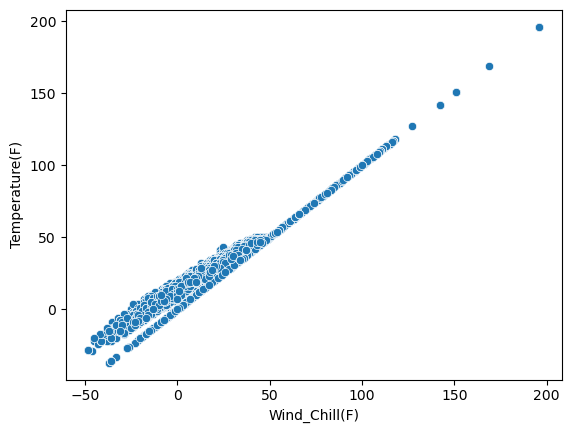

In [5]:
sns.scatterplot(x="Wind_Chill(F)",
                y="Temperature(F)",
                data=df)

In [6]:
x = df['Wind_Chill(F)']
y = df['Temperature(F)']
w = 0
y_hat = w*x

loss = ((y_hat-y)**2).mean()
print(loss)

4663.397171414028


In [7]:
dldw = (2*(w*x-y)*x).mean()
dldw

np.float64(-9269.760121341598)

In [8]:
w = w-0.01*dldw
w

np.float64(92.69760121341598)

In [9]:
y_hat = w*x

loss = ((y_hat-y)**2).mean()
print(loss)

38780463.02965074


In [17]:
def forward (w,x):
    return w*x
def lossf (y_pred,y):
    return ((y_pred-y)**2).mean()
#why y_hat changed to y_pred? Is y_pred=w*x?
def gradient (x,y,w):
    gr=(2*(w*x-y)*x).mean()
    return gr

x = df['Wind_Chill(F)']
y = df['Temperature(F)']

w=0
ep=10
lr=0.0001
ws=np.array([w])

for epoch in range (ep):
    y_hat=forward(w,x)
    loss=lossf(y_hat,y)
    gr=gradient (x,y,w)
    w-=gr*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, loss = {loss:.3f}') #what is f' epoch
    ws=np.append(ws,w) 

 epoch 1: w= 0.927, loss = 4663.397
 epoch 2: w= 0.999, loss = 34.060
 epoch 3: w= 1.004, loss = 6.265
 epoch 4: w= 1.005, loss = 6.098
 epoch 5: w= 1.005, loss = 6.097
 epoch 6: w= 1.005, loss = 6.097
 epoch 7: w= 1.005, loss = 6.097
 epoch 8: w= 1.005, loss = 6.097
 epoch 9: w= 1.005, loss = 6.097
 epoch 10: w= 1.005, loss = 6.097


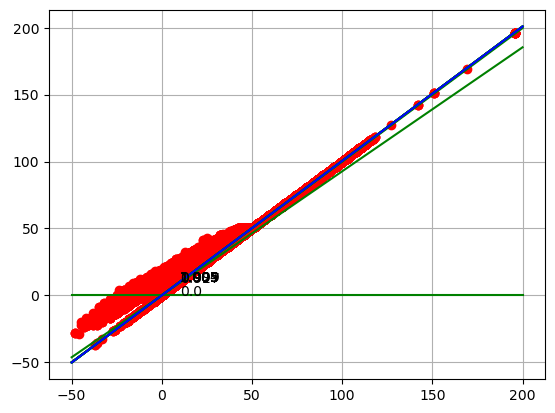

In [19]:
fig=plt.figure()
xv=np.linspace(-50,200, 1000)
plt.grid()

plt.plot(x,y,'ro')  
for i in range(len(ws)-1):
    plt.plot(xv, ws[i]*xv, 'g')   
    plt.annotate(np.round(ws[i],3), xy=(10,ws[i]*10))
plt.plot(xv, ws[-1]*xv, 'b') 
plt.show()

In [20]:
def forward (w,x,b):
    return w*x+b
def lossf (y_pred,y):
    return ((y_pred-y)**2).mean()
def gradient (x,b,y,w):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

x = df['Wind_Chill(F)']
y = df['Temperature(F)']

w=0
b=0
ep=10
lr=0.0001
param=np.array([w,b])

for epoch in range (ep):
    y_hat=forward(w,x,b)
    loss=lossf(y_hat,y)
    gr_w, gr_b=gradient (x,b,y,w)
    w-=gr_w*lr
    b-=gr_b*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}') #what is f' epoch
    param=np.vstack((param,[w,b])) 

 epoch 1: w= 0.927, b= 0.013, loss = 4663.397
 epoch 2: w= 0.999, b= 0.014, loss = 33.914
 epoch 3: w= 1.004, b= 0.014, loss = 6.249
 epoch 4: w= 1.005, b= 0.015, loss = 6.084
 epoch 5: w= 1.005, b= 0.015, loss = 6.083
 epoch 6: w= 1.005, b= 0.015, loss = 6.083
 epoch 7: w= 1.005, b= 0.015, loss = 6.083
 epoch 8: w= 1.005, b= 0.015, loss = 6.082
 epoch 9: w= 1.005, b= 0.015, loss = 6.082
 epoch 10: w= 1.005, b= 0.015, loss = 6.082


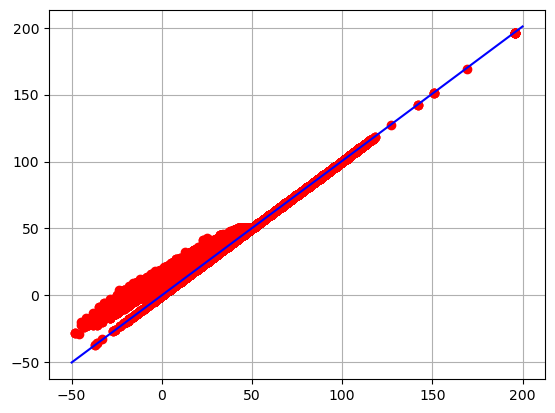

In [21]:
fig=plt.figure()
xv=np.linspace(-50,200,1000)
plt.grid()

plt.plot(x,y,'ro')          

plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')
plt.show()

In [26]:
def forward(w,b,x):
    return w*x+b
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, b, y, x):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

def shuffle_data(X,y):
    N = X.shape[0]
    shuffled_idx = np.random.permutation(N)
    return X[shuffled_idx], y[shuffled_idx]
    
x = df['Wind_Chill(F)']
y = df['Temperature(F)']
x,y = shuffle_data(x, y)
N=x.shape[0]
batch_size=100000
n_batches=N//batch_size

w=0.0
b=0.0
ep=3
lr=0.0001
param=np.array([w,b])

for epoch in range(ep):
    running_loss = 0.0
    bn=1
    for b_idx in range(0, N, batch_size):
        x_batch=x[b_idx:b_idx+batch_size]
        y_batch=y[b_idx:b_idx+batch_size]
    
        y_hat=forward(w,b,x_batch)
        loss=lossfunc(y_hat,y_batch)
        running_loss+=(loss*x_batch.shape[0])
        gr_w, gr_b=gradient(w, b, y_batch,x_batch)
    
        w-=gr_w*lr
        b-=gr_b*lr
    
        print(f' epoch {epoch+1}, batch {bn}: loss = {loss:.3f} ')
        bn+=1
        avg_loss = running_loss/ N
        print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {avg_loss:.3f}')
        param=np.vstack((param,[w,b]))

 epoch 1, batch 1: loss = 4661.202 
 epoch 1: w= 0.927, b= 0.013, loss = 164.113
 epoch 1, batch 2: loss = 34.242 
 epoch 1: w= 0.999, b= 0.014, loss = 165.318
 epoch 1, batch 3: loss = 6.166 
 epoch 1: w= 1.004, b= 0.014, loss = 165.535
 epoch 1, batch 4: loss = 5.975 
 epoch 1: w= 1.005, b= 0.015, loss = 165.746
 epoch 1, batch 5: loss = 5.962 
 epoch 1: w= 1.005, b= 0.015, loss = 165.956
 epoch 1, batch 6: loss = 6.033 
 epoch 1: w= 1.005, b= 0.015, loss = 166.168
 epoch 1, batch 7: loss = 6.211 
 epoch 1: w= 1.005, b= 0.015, loss = 166.387
 epoch 1, batch 8: loss = 6.170 
 epoch 1: w= 1.005, b= 0.015, loss = 166.604
 epoch 1, batch 9: loss = 6.043 
 epoch 1: w= 1.005, b= 0.015, loss = 166.817
 epoch 1, batch 10: loss = 6.129 
 epoch 1: w= 1.005, b= 0.015, loss = 167.032
 epoch 1, batch 11: loss = 6.152 
 epoch 1: w= 1.005, b= 0.015, loss = 167.249
 epoch 1, batch 12: loss = 6.073 
 epoch 1: w= 1.005, b= 0.015, loss = 167.463
 epoch 1, batch 13: loss = 6.048 
 epoch 1: w= 1.005, b= 

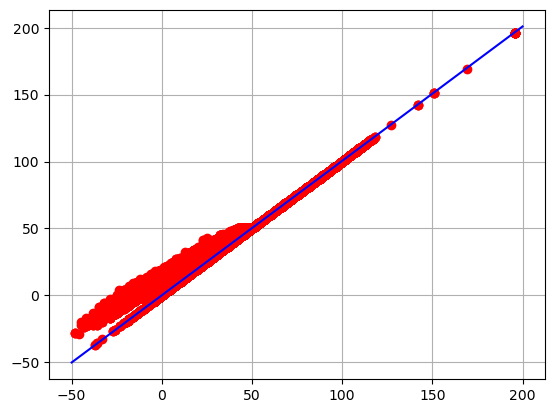

In [27]:
fig=plt.figure()
xv=np.linspace(-50,200, 1000)
plt.grid()

plt.plot(x,y,'ro')  
plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')  
plt.show()

In [40]:
xt=torch.tensor(df['Wind_Chill(F)'],dtype=torch.float32)
yt=torch.tensor(df['Temperature(F)'],dtype=torch.float32)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


lr=0.00001
ep=10

def forward(w,b,x):
    return w*x+b
    
lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD([w, b], lr=lr) 

for epoch in range(ep):

    y_pred=forward(w, b, xt)
    loss=lossfunc(yt, y_pred)
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()

    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}')   

 epoch 1: w= 0.093, b= 0.001, loss = 4663.397
 epoch 2: w= 0.177, b= 0.003, loss = 3843.590
 epoch 3: w= 0.253, b= 0.004, loss = 3168.090
 epoch 4: w= 0.323, b= 0.005, loss = 2611.495
 epoch 5: w= 0.385, b= 0.005, loss = 2152.875
 epoch 6: w= 0.443, b= 0.006, loss = 1774.984
 epoch 7: w= 0.494, b= 0.007, loss = 1463.612
 epoch 8: w= 0.542, b= 0.008, loss = 1207.049
 epoch 9: w= 0.584, b= 0.008, loss = 995.648
 epoch 10: w= 0.623, b= 0.009, loss = 821.459


In [43]:
xt=torch.tensor(df['Wind_Chill(F)'],dtype=torch.float32).reshape(-1,1)
yt=torch.tensor(df['Temperature(F)'],dtype=torch.float32).reshape(-1,1)

n_sample, n_features = xt.shape

model=nn.Linear(n_features, 1) 

with torch.inference_mode(): 
    model.weight[0,0] = 0
    model.bias[0] = 0

lr=0.00001
ep=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)  

for epoch in range(ep):
    y_pred=model(xt)
    loss=lossfunc(yt, y_pred)
    loss.backward()   
    optimizer.step()
    optimizer.zero_grad()
    
    [w,b]=model.parameters()
    print(f' epoch {epoch+1}: w= {w[0][0]:.3f}, b= {b[0]:.3f}, loss = {loss:.3f}')   

 epoch 1: w= 0.093, b= 0.001, loss = 4663.397
 epoch 2: w= 0.177, b= 0.003, loss = 3844.326
 epoch 3: w= 0.253, b= 0.004, loss = 3168.547
 epoch 4: w= 0.322, b= 0.005, loss = 2611.948
 epoch 5: w= 0.386, b= 0.005, loss = 2153.431
 epoch 6: w= 0.443, b= 0.006, loss = 1774.836
 epoch 7: w= 0.495, b= 0.007, loss = 1463.580
 epoch 8: w= 0.542, b= 0.008, loss = 1206.740
 epoch 9: w= 0.584, b= 0.008, loss = 995.203
 epoch 10: w= 0.623, b= 0.009, loss = 821.212
